# Amzon Sales Data Visualization


#### Load the Packages we need

In [206]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

#### Read the file
#### Exploratory Data Analysis

In [207]:
df = pd.read_excel("AmazonSalebyCategory.xlsx")
print(df.head(10))
print("\n\n\n")
print(df.info())
print("\n\n\n")
print(df.tail(5))
print("\n\n\n")

                   Day Day of Week         US Store Category Qty Sold
0  2022-05-25 00:00:00   Wednesday                 Radiators       50
1  2022-05-25 00:00:00   Wednesday           Complete Struts       50
2  2022-05-25 00:00:00   Wednesday              Brake Rotors       50
3  2022-05-25 00:00:00   Wednesday  Performance Brake Rotors       43
4  2022-05-25 00:00:00   Wednesday              Hub Bearings       37
5  2022-05-25 00:00:00   Wednesday            Brake Calipers       25
6  2022-05-25 00:00:00   Wednesday               Control Arm       20
7  2022-05-25 00:00:00   Wednesday                    Shocks       17
8  2022-05-25 00:00:00   Wednesday                   Exhaust       17
9  2022-05-25 00:00:00   Wednesday              Side Mirrors       13




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Day                629 

#### We saw that the last row of df is the total of numerical values
#### We should not include it when we are trying to find if there is any NULL in the columns

In [208]:
print("--Number of Null in each column--")
print(df[:-1].isnull().sum())
print("\n\n\n")
print(df.shape)

--Number of Null in each column--
Day                  0
Day of Week          0
US Store Category    0
Qty Sold             0
dtype: int64




(629, 4)


#### Convert the datetime to date

In [5]:
df = df[:-1]
df['Day'] = pd.to_datetime(df['Day']).dt.date
df.tail(5)

,Day,Day of Week,US Store Category,Qty Sold
623,2022-04-26,Tuesday,Semi Metallic Brake Pads,8
624,2022-04-26,Tuesday,Drive Shafts,4
625,2022-04-26,Tuesday,Window Regulators,4
626,2022-04-26,Tuesday,Wheel Bearings,2
627,2022-04-26,Tuesday,Performance Brake Pads,1


#### Now we can overview our dataset

In [6]:
print("This Dataset contains Amazon Sales data for {} Categoies.".format(len(df['US Store Category'].unique())))
print("From {} to {}, in total of {} days.".format(min(df['Day']), max(df['Day']), len(df['Day'].unique())))

This Dataset contains Amazon Sales data for 24 Categoies.
From 2022-04-26 to 2022-05-25, in total of 30 days.


#### 1. Group the data by Categories

In [7]:
Category_Sale = df.groupby(['US Store Category'], as_index=False)['Qty Sold'].sum()
Category_Sale = Category_Sale.sort_values('Qty Sold', ascending=False).reset_index(drop=True)
Category_Sale

,US Store Category,Qty Sold
0,Radiators,5071
1,Performance Brake Rotors,4407
2,Complete Struts,4287
3,Brake Rotors,3770
4,Brake Calipers,3481
5,Hub Bearings,3128
6,Control Arm,1888
7,Axle Shafts,1427
8,Shocks,1209
9,Exhaust,1132


#### 2. Group the Data by the Day of Sales

In [8]:
Day_Sale = df.groupby(['Day of Week'], as_index=False)['Qty Sold'].sum()
Day_Sale = Day_Sale.sort_values('Qty Sold', ascending=False).reset_index(drop=True)
Day_Sale

,Day of Week,Qty Sold
0,Tuesday,6127
1,Monday,5349
2,Wednesday,4863
3,Sunday,4728
4,Thursday,4463
5,Friday,4393
6,Saturday,4248


#### 3. Group the Data by Date

In [9]:
Date_Sale = df.groupby(['Day'], as_index=False)['Qty Sold'].sum()
Date_Sale

,Day,Qty Sold
0,2022-04-26,1185
1,2022-04-27,1084
2,2022-04-28,1049
3,2022-04-29,1079
4,2022-04-30,1100
5,2022-05-01,1228
6,2022-05-02,1248
7,2022-05-03,1228
8,2022-05-04,1112
9,2022-05-05,1080


#### Visualizations Analysis
*Line Chart, Scatter Chart, Bar Chart*

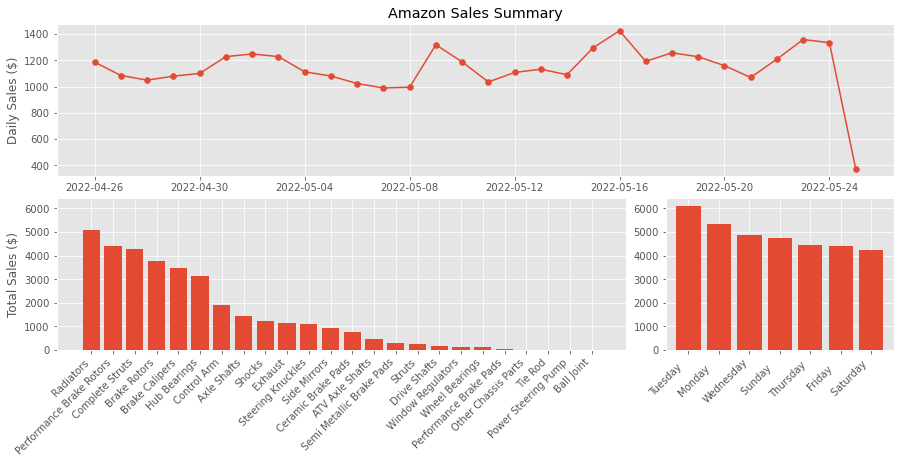

In [86]:
plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(2, 2, width_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[1,0])
ax0.bar(Category_Sale['US Store Category'], Category_Sale['Qty Sold'])
ax0.grid(True)
ax0.set_ylabel('Total Sales ($)')
ax0.set_xticklabels(Category_Sale['US Store Category'],rotation=45,ha='right')

ax1 = plt.subplot(gs[1,1], sharey=ax0)
ax1.bar(Day_Sale['Day of Week'], Day_Sale['Qty Sold'])
ax1.grid(True)
ax1.set_xticklabels(Day_Sale['Day of Week'],rotation=45,ha='right')

ax2 = plt.subplot(gs[0,:])
ax2.plot(Date_Sale['Day'], Date_Sale['Qty Sold'])
ax2.scatter(Date_Sale['Day'], Date_Sale['Qty Sold'])
ax2.grid(True)
ax2.set_ylabel('Daily Sales ($)')
ax2.set_xticks(Date_Sale['Day'][::4])

plt.subplots_adjust(hspace=0.15, wspace=0.1)

plt.title('Amazon Sales Summary')
plt.show()

#### Visualization Analysis
*Pie Chart*

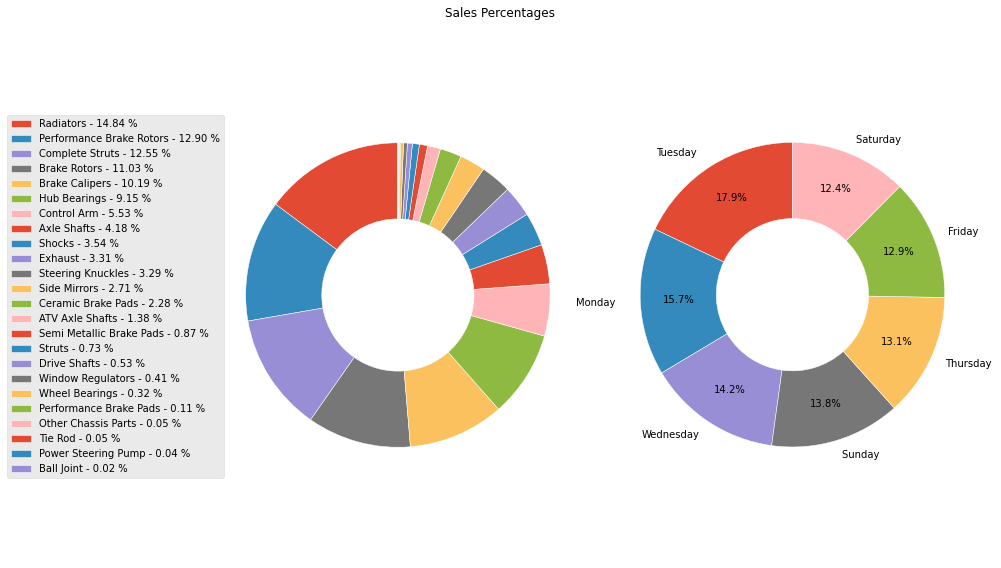

In [204]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
fig.suptitle("Sales Percentages")


ax1.pie(Category_Sale['Qty Sold'], startangle=90, wedgeprops=dict(width=0.5, edgecolor='w'), pctdistance=0.75)
percent = 100*Category_Sale['Qty Sold']/Category_Sale['Qty Sold'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(Category_Sale['US Store Category'], percent)]
box = ax1.get_position()
ax1.legend(labels,bbox_to_anchor=(0,0.85))
ax1.axis('equal')


ax2.pie(Day_Sale['Qty Sold'], labels=Day_Sale['Day of Week'], startangle=90, autopct='%1.1f%%',wedgeprops=dict(width=0.5, edgecolor='w'), pctdistance=0.75)
ax2.axis('equal')


plt.tight_layout()


#### Visualization Analysis
*Display the Sales per Day for each category*

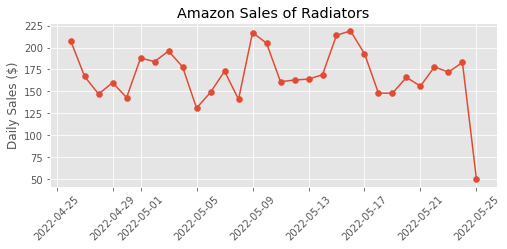

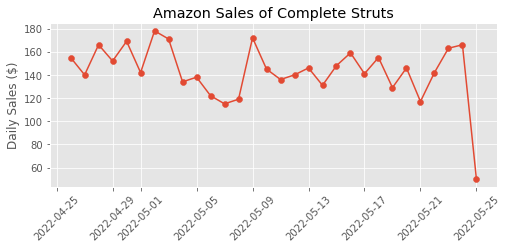

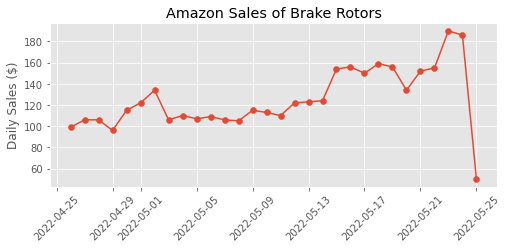

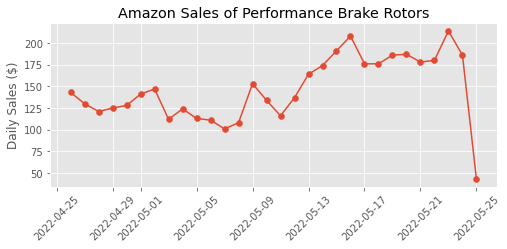

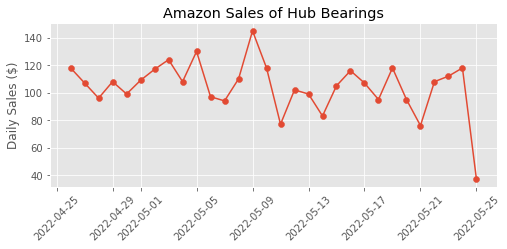

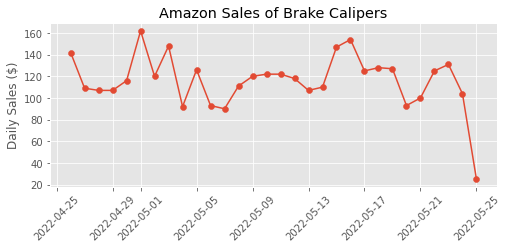

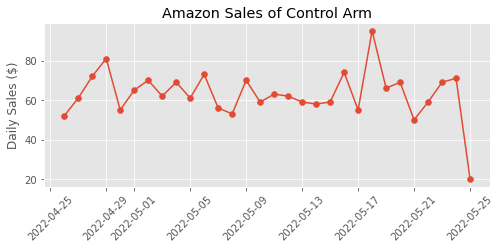

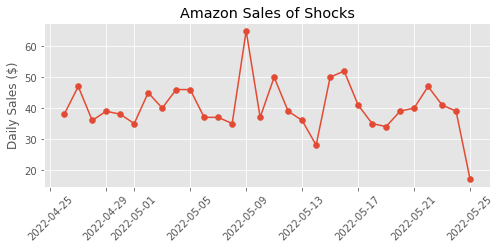

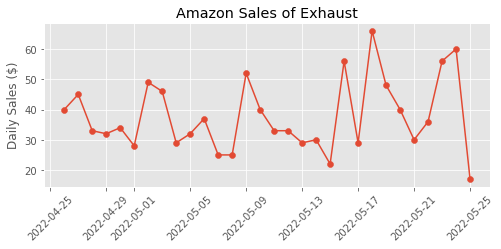

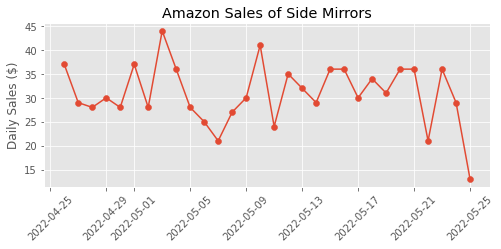

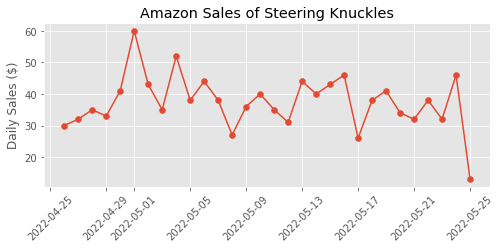

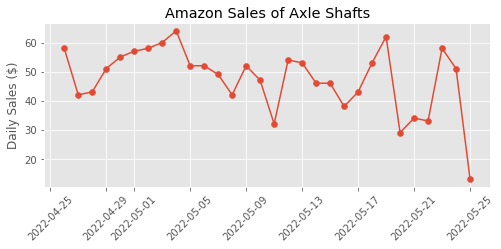

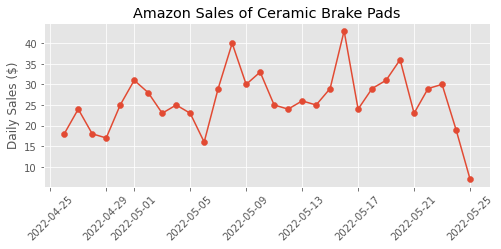

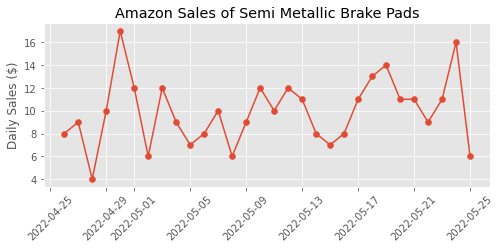

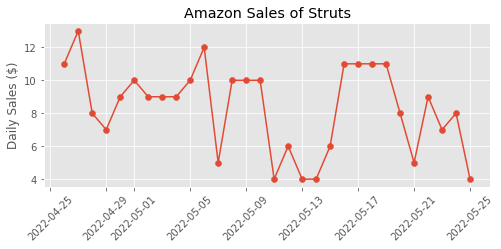

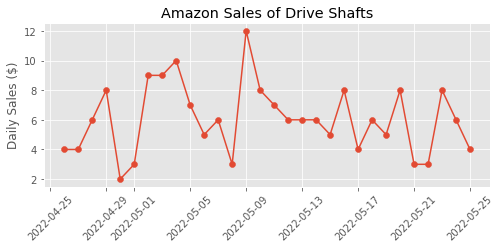

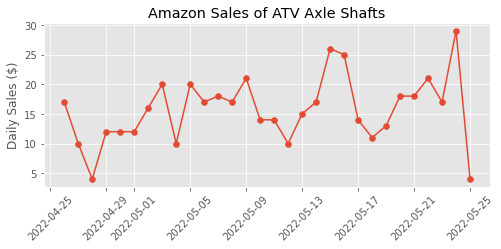

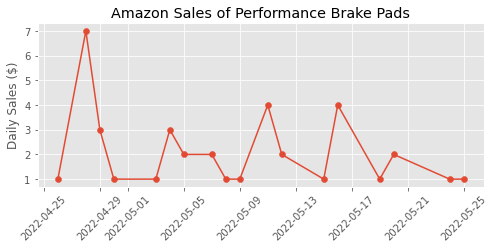

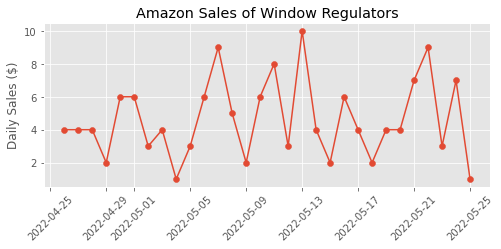

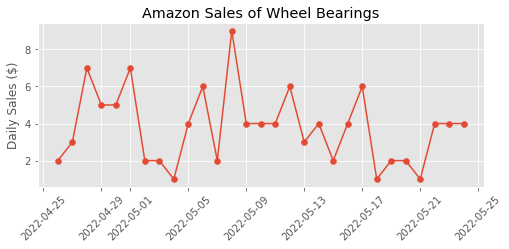

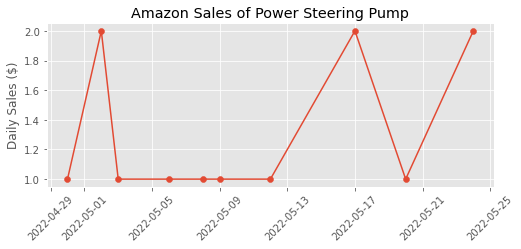

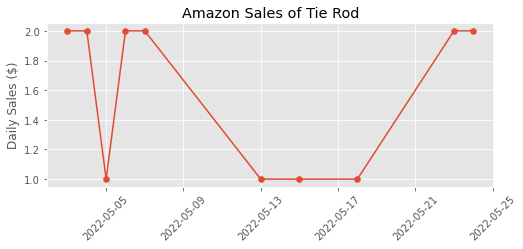

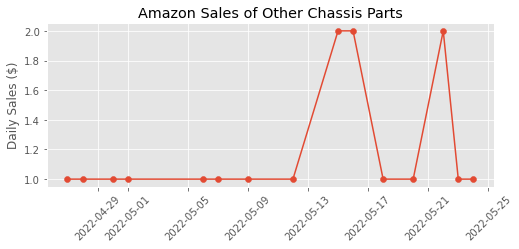

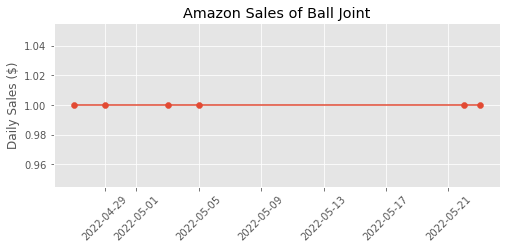

In [87]:
for i in df['US Store Category'].unique():
    temp = df[df['US Store Category'] == i]
    plt.figure(figsize=(8,3))
    plt.plot(temp['Day'], temp['Qty Sold'])
    plt.scatter(temp['Day'], temp['Qty Sold'])
    plt.xticks(rotation=45)
    plt.title('Amazon Sales of {}'.format(i))
    plt.ylabel('Daily Sales ($)')
    plt.show()